# Explore feature-to-feature relationship in Boston

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
from discover_feature_relationships import discover
import matplotlib.pyplot as plt

In [2]:
# watermark is optional - it shows the versions of installed libraries
# so it is useful to confirm your library versions when you submit bug reports to projects
# install watermark using
# %install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py
%load_ext watermark
# show a watermark for this environment
%watermark -d -m -v -p numpy,matplotlib,sklearn -g

2019-01-10 

CPython 3.6.6
IPython 7.2.0

numpy 1.15.4
matplotlib 3.0.2
sklearn 0.20.2

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.19.8-041908-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : a2d07909b67f4845f1861dc6e0a83c7e80bb32eb


In [3]:
example_dataset = datasets.load_boston()
df_boston = pd.DataFrame(example_dataset.data, columns=example_dataset.feature_names)
df_boston['target'] = example_dataset.target

df = df_boston
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target']
classifier_overrides = set()

df = df_boston
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Discover non-linear relationships

_Github note_ colours for `style` don't show up in Github, you'll have to grab a local copy of the Notebook.

* NOX predicts RAD, INDUS, TAX and DIS
* RAD predicts DIS poorly, NOX better, TAX better
* CRIM predicts RAD but RAD poorly predicts CRIM

CPU times: user 25.2 s, sys: 14.6 ms, total: 25.2 s
Wall time: 25.3 s


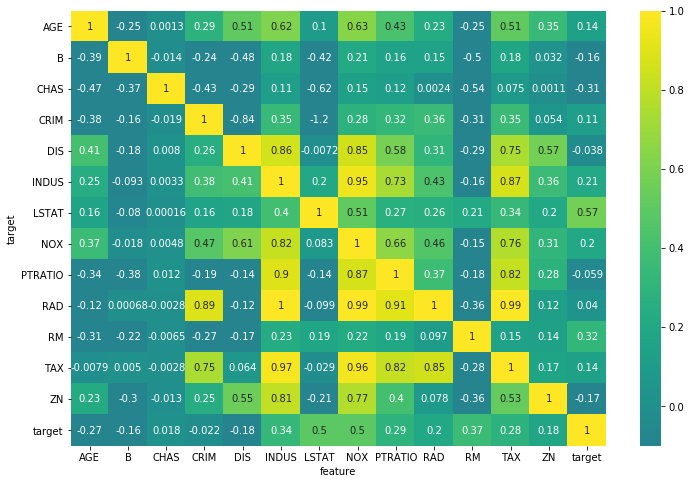

In [4]:
%time df_results = discover.discover(df[cols].sample(frac=1), classifier_overrides)

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_results.pivot(index='target', columns='feature', values='score').fillna(1),
            annot=True, center=0, ax=ax, vmin=-0.1, vmax=1, cmap="viridis");

In [5]:
# we can also output a DataFrame using style (note - doesn't render on github with colours, look at a local Notebook!)
df_results.pivot(index='target', columns='feature', values='score').fillna(1) \
.style.background_gradient(cmap="viridis", low=0.7, axis=1) \
.set_precision(2)

feature,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN,target
target,,,,,,,,,,,,,,
AGE,1,-0.25,0.0013,0.29,0.51,0.62,0.1,0.63,0.43,0.23,-0.25,0.51,0.35,0.14
B,-0.39,1,-0.014,-0.24,-0.48,0.18,-0.42,0.21,0.16,0.15,-0.5,0.18,0.032,-0.16
CHAS,-0.47,-0.37,1,-0.43,-0.29,0.11,-0.62,0.15,0.12,0.0024,-0.54,0.075,0.0011,-0.31
CRIM,-0.38,-0.16,-0.019,1,-0.84,0.35,-1.2,0.28,0.32,0.36,-0.31,0.35,0.054,0.11
DIS,0.41,-0.18,0.008,0.26,1,0.86,-0.0072,0.85,0.58,0.31,-0.29,0.75,0.57,-0.038
INDUS,0.25,-0.093,0.0033,0.38,0.41,1,0.2,0.95,0.73,0.43,-0.16,0.87,0.36,0.21
LSTAT,0.16,-0.08,0.00016,0.16,0.18,0.4,1,0.51,0.27,0.26,0.21,0.34,0.2,0.57
NOX,0.37,-0.018,0.0048,0.47,0.61,0.82,0.083,1,0.66,0.46,-0.15,0.76,0.31,0.2
PTRATIO,-0.34,-0.38,0.012,-0.19,-0.14,0.9,-0.14,0.87,1,0.37,-0.18,0.82,0.28,-0.059


# We can drill in to some of the discovered relationships

In [6]:
print(example_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

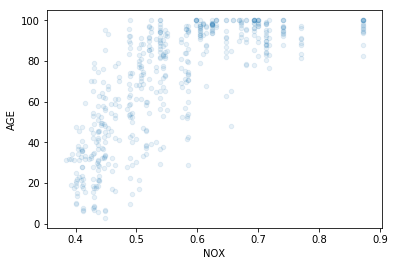

In [7]:
# NOX (pollution) predicts AGE of properties - lower pollution means more houses built after 1940 than before
df.plot(kind="scatter", x="NOX", y="AGE", alpha=0.1);

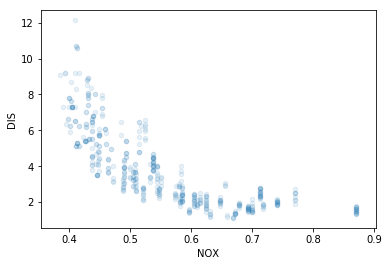

In [8]:
# NOX (pollution) predicts DIStance, lower pollution means larger distance to places of work
df.plot(kind="scatter", x="NOX", y="DIS", alpha=0.1);

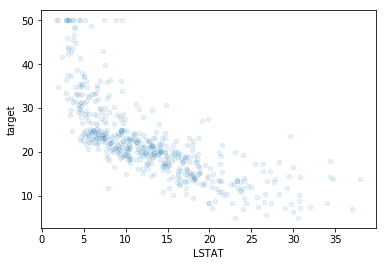

In [9]:
# More lower-status people means lower house prices
ax = df.plot(kind="scatter", x="LSTAT", y="target", alpha=0.1);

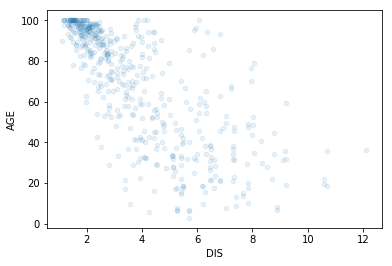

In [10]:
# closer to employment centres means higher proportion of owner-occupied residences built prior to 1940 (i.e. more older houses)
ax = df.plot(kind="scatter", x="DIS", y="AGE", alpha=0.1);

# Try correlations

Correlations can give us a direction and information about linear and rank-based relationships which we won't get from RF.

## Pearson (linear)

In [11]:
df_results = discover.discover(df[cols], classifier_overrides, method='pearson')

df_results.pivot(index='target', columns='feature', values='score').fillna(1) \
.style.background_gradient(cmap="viridis", axis=1) \
.set_precision(2)

feature,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN,target
target,,,,,,,,,,,,,,
AGE,1,-0.27,0.087,0.35,-0.75,0.64,0.6,0.73,0.26,0.46,-0.24,0.51,-0.57,-0.38
B,-0.27,1,0.049,-0.39,0.29,-0.36,-0.37,-0.38,-0.18,-0.44,0.13,-0.44,0.18,0.33
CHAS,0.087,0.049,1,-0.056,-0.099,0.063,-0.054,0.091,-0.12,-0.0074,0.091,-0.036,-0.043,0.18
CRIM,0.35,-0.39,-0.056,1,-0.38,0.41,0.46,0.42,0.29,0.63,-0.22,0.58,-0.2,-0.39
DIS,-0.75,0.29,-0.099,-0.38,1,-0.71,-0.5,-0.77,-0.23,-0.49,0.21,-0.53,0.66,0.25
INDUS,0.64,-0.36,0.063,0.41,-0.71,1,0.6,0.76,0.38,0.6,-0.39,0.72,-0.53,-0.48
LSTAT,0.6,-0.37,-0.054,0.46,-0.5,0.6,1,0.59,0.37,0.49,-0.61,0.54,-0.41,-0.74
NOX,0.73,-0.38,0.091,0.42,-0.77,0.76,0.59,1,0.19,0.61,-0.3,0.67,-0.52,-0.43
PTRATIO,0.26,-0.18,-0.12,0.29,-0.23,0.38,0.37,0.19,1,0.46,-0.36,0.46,-0.39,-0.51


## Spearman (rank-based)

In [12]:
df_results = discover.discover(df[cols], classifier_overrides, method='spearman')

df_results.pivot(index='target', columns='feature', values='score').fillna(1) \
.style.background_gradient(cmap="viridis", axis=1) \
.set_precision(2)

feature,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN,target
target,,,,,,,,,,,,,,
AGE,1,-0.23,0.068,0.7,-0.8,0.68,0.66,0.8,0.36,0.42,-0.28,0.53,-0.54,-0.55
B,-0.23,1,-0.04,-0.36,0.25,-0.29,-0.21,-0.3,-0.072,-0.28,0.054,-0.33,0.16,0.19
CHAS,0.068,-0.04,1,0.042,-0.08,0.09,-0.051,0.068,-0.14,0.025,0.059,-0.044,-0.042,0.14
CRIM,0.7,-0.36,0.042,1,-0.74,0.74,0.63,0.82,0.47,0.73,-0.31,0.73,-0.57,-0.56
DIS,-0.8,0.25,-0.08,-0.74,1,-0.76,-0.56,-0.88,-0.32,-0.5,0.26,-0.57,0.61,0.45
INDUS,0.68,-0.29,0.09,0.74,-0.76,1,0.64,0.79,0.43,0.46,-0.42,0.66,-0.64,-0.58
LSTAT,0.66,-0.21,-0.051,0.63,-0.56,0.64,1,0.64,0.47,0.39,-0.64,0.53,-0.49,-0.85
NOX,0.8,-0.3,0.068,0.82,-0.88,0.79,0.64,1,0.39,0.59,-0.31,0.65,-0.63,-0.56
PTRATIO,0.36,-0.072,-0.14,0.47,-0.32,0.43,0.47,0.39,1,0.32,-0.31,0.45,-0.45,-0.56


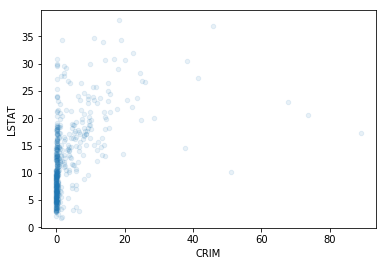

In [13]:
ax = df.plot(kind="scatter", x="CRIM", y="LSTAT", alpha=0.1);

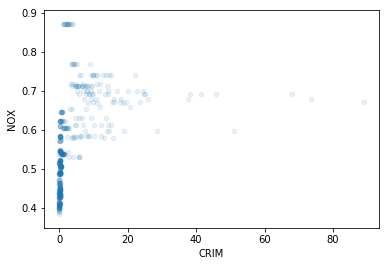

In [14]:
ax = df.plot(kind="scatter", x="CRIM", y="NOX", alpha=0.1);